In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from mlcompetitions import ML_competitions,ex_describe,forest_feature_importance,pairplot,single_feature_visualisation,count_data_types_diff,missing_values_count
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import matplotlib.pyplot as plt
from collections import Counter
#rom IPython.core.interactiveshell import InteractiveShell
#nteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
path=r'data'
save_path=r'save'
x_test=pd.read_csv(os.path.join(path,'test.csv'),sep=',',parse_dates=['timestamp'])
x_train=pd.read_csv(os.path.join(path,'train.csv'),sep=',',parse_dates=['timestamp'])
y_train=x_train.price_doc.values.ravel()
x_train.drop('price_doc',axis=1,inplace=True)
macro=pd.read_csv(os.path.join(path,'macro.csv'),sep=',',parse_dates=['timestamp'])
print('train_data shape:',x_train.shape,'\ntest_data shape:',x_test.shape)

train_data shape: (30471, 291) 
test_data shape: (7662, 291)


# Task description  
Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

In this competition, Sberbank is challenging Kagglers to develop algorithms which use a broad spectrum of features to predict realty prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy. <br>  **train.csv** and **test.csv**:
 

  **feature** | **description**
  ------------- | -------------|
price_doc| sale price (this is the target variable)
id| transaction id
timestamp| date of transaction
full_sq| total area in square meters, including loggias, balconies and other non-residential areas
life_sq| living area in square meters, excluding loggias, balconies and other non-residential areas
floor| for apartments, floor of the building
max_floor| number of floors in the building
material| wall material
build_year| year built
num_room| number of living rooms
kitch_sq| kitchen area
state| apartment condition
product_type| owner-occupier purchase or investment
sub_area| name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

  **feature** | **description**
  ------------- | -------------|
full_all| subarea population
male_f, female_f| subarea population by gender
young_*| population younger than working age
work_*| working-age population
ekder_*| retirement-age population
n_m_{all/male/female}| population between n and m years old
build_count_*| buildings in the subarea by construction type or year
x_count_500| the number of x within 500m of the property
x_part_500| the share of x within 500m of the property
_sqm_| square meters
cafe_count_d_price_p| number of cafes within d meters of the property that have an average bill under p RUB
trc_| shopping malls
prom_| industrial zones
green_| green zones
metro_| subway
_avto_| distances by car
mkad_| Moscow Circle Auto Road
ttk_| Third Transport Ring
sadovoe_| Garden Ring
bulvar_ring_| Boulevard Ring
kremlin_| City center
zd_vokzaly_| Train station
oil_chemistry_| Dirty industry
ts_| Power plant

### Complete description of neighbourhood features
<details>
  <summary>hide/show  **click**</summary>
 
 <table border="1">

   <tr>
    <th>feature</th>
    <th>description</th>

   </tr>
<tr><td>area_m</td><td>Area mun. area, sq.m.</td></tr>
<tr><td>raion_popul</td><td>Number of municipality population. district</td></tr>
<tr><td>green_zone_part</td><td>Proportion of area of â€‹â€‹greenery in the total area</td></tr>
<tr><td>indust_part</td><td>Share of industrial zones in area of â€‹â€‹the total area</td></tr>
<tr><td>children_preschool</td><td>Number of pre-school age population</td></tr>
<tr><td>preschool_quota</td><td>Number of seats in pre-school organizations</td></tr>
<tr><td>preschool_education_centers_raion</td><td>Number of pre-school  institutions</td></tr>
<tr><td>children_school</td><td>Population of school-age children</td></tr>
<tr><td>school_quota</td><td>Number of high school seats in area</td></tr>
<tr><td>school_education_centers_raion</td><td>Number of  high school institutions</td></tr>
<tr><td>school_education_centers_top_20_raion</td><td>Number of high schools of the top 20 best schools in Moscow</td></tr>
<tr><td>hospital_beds_raion</td><td>Number of hospital beds for the district</td></tr>
<tr><td>healthcare_centers_raion</td><td>Number of healthcare centers in district</td></tr>
<tr><td>university_top_20_raion</td><td>Number of higher education institutions in the top ten ranking of the Federal rank</td></tr>
<tr><td>sport_objects_raion</td><td>Number of higher education institutions</td></tr>
<tr><td>additional_education_raion</td><td>Number of additional education organizations</td></tr>
<tr><td>culture_objects_top_25</td><td>Presence of the key objects of cultural heritage (significant objects for the level of the RF constituent entities, city)</td></tr>
<tr><td>culture_objects_top_25_raion</td><td>Number of  objects of cultural heritage</td></tr>
<tr><td>shopping_centers_raion</td><td>Number of malls and shopping centres in district</td></tr>
<tr><td>office_raion</td><td>Number of malls and shopping centres in district</td></tr>
<tr><td>thermal_power_plant_raion</td><td>Presence of thermal power station in district</td></tr>
<tr><td>incineration_raion</td><td>Presence of incinerators</td></tr>
<tr><td>oil_chemistry_raion</td><td>Presence of dirty industries</td></tr>
<tr><td>radiation_raion</td><td>Presence of radioactive waste disposal</td></tr>
<tr><td>railroad_terminal_raion</td><td>Presence of the railroad terminal in district</td></tr>
<tr><td>big_market_raion</td><td>Presence of large grocery / wholesale markets</td></tr>
<tr><td>nuclear_reactor_raion</td><td>Presence of existing nuclear reactors</td></tr>
<tr><td>detention_facility_raion</td><td>Presence of detention centers, prisons</td></tr>
<tr><td>full_all</td><td>Total number of  population in the municipality</td></tr>
<tr><td>male_f</td><td>Male population</td></tr>
<tr><td>female_f</td><td>Female population</td></tr>
<tr><td>young_all</td><td>Population younger than working age</td></tr>
<tr><td>young_male</td><td>Male population younger than working age </td></tr>
<tr><td>young_female</td><td>Feale population younger than working age </td></tr>
<tr><td>work_all</td><td>Working-age population</td></tr>
<tr><td>work_male</td><td>Male working-age population</td></tr>
<tr><td>work_female</td><td>Female working-age population</td></tr>
<tr><td>ekder_all</td><td>Population older than  working age</td></tr>
<tr><td>ekder_male</td><td>Male population older than  working age</td></tr>
<tr><td>ekder_female</td><td>Female population older than  working age</td></tr>
<tr><td>0_6_all</td><td>Population aged 0-6</td></tr>
<tr><td>0_6_male</td><td>Male population aged 0-7</td></tr>
<tr><td>0_6_female</td><td>Female population aged 0-8</td></tr>
<tr><td>7_14_all</td><td>Population aged  7-14</td></tr>
<tr><td>7_14_male</td><td>Male population aged 7-14</td></tr>
<tr><td>7_14_female</td><td>Female population aged 7-14</td></tr>
<tr><td>0_17_all</td><td>Population aged 0-17</td></tr>
<tr><td>0_17_male</td><td>Male population aged 0-17</td></tr>
<tr><td>0_17_female</td><td>Female population aged 0-17</td></tr>
<tr><td>16_29_all</td><td>Population aged 16-19</td></tr>
<tr><td>16_29_male</td><td>Male population aged 16-19</td></tr>
<tr><td>16_29_female</td><td>Female population aged 16-19</td></tr>
<tr><td>0_13_all</td><td>Population aged 0-13</td></tr>
<tr><td>0_13_male</td><td>Male population aged 0-13</td></tr>
<tr><td>0_13_female</td><td>Female population aged 0-13</td></tr>
<tr><td>raion_build_count_with_material_info</td><td>Number of building with material info in district</td></tr>
<tr><td>build_count_block</td><td>Share of block buildings</td></tr>
<tr><td>build_count_wood</td><td>Share of wood buildings</td></tr>
<tr><td>build_count_frame</td><td>Share of frame buildings</td></tr>
<tr><td>build_count_brick</td><td>Share of brick buildings</td></tr>
<tr><td>build_count_monolith</td><td>Share of monolith buildings</td></tr>
<tr><td>build_count_panel</td><td>Share of panel buildings</td></tr>
<tr><td>build_count_foam</td><td>Share of foam buildings</td></tr>
<tr><td>build_count_slag</td><td>Share of slag buildings</td></tr>
<tr><td>build_count_mix</td><td>Share of mixed buildings</td></tr>
<tr><td>raion_build_count_with_builddate_info</td><td>Number of building with build year info in district</td></tr>
<tr><td>build_count_before_1920</td><td>Share of before_1920 buildings</td></tr>
<tr><td>build_count_1921-1945</td><td>Share of 1921-1945 buildings</td></tr>
<tr><td>build_count_1946-1970</td><td>Share of 1946-1970 buildings</td></tr>
<tr><td>build_count_1971-1995</td><td>Share of 1971-1995 buildings</td></tr>
<tr><td>build_count_after_1995</td><td>Share of after_1995 buildings</td></tr>
<tr><td>7_14_male</td><td>Male population aged 7-14</td></tr>
<tr><td>7_14_female</td><td>Female population aged 7-14</td></tr>
<tr><td>0_17_all</td><td>Population aged 0-17</td></tr>
<tr><td>0_17_male</td><td>Male population aged 0-17</td></tr>
<tr><td>0_17_female</td><td>Female population aged 0-17</td></tr>
<tr><td>16_29_all</td><td>Population aged 16-19</td></tr>
<tr><td>16_29_male</td><td>Male population aged 16-19</td></tr>
<tr><td>16_29_female</td><td>Female population aged 16-19</td></tr>
<tr><td>0_13_all</td><td>Population aged 0-13</td></tr>
<tr><td>0_13_male</td><td>Male population aged 0-13</td></tr>
<tr><td>0_13_female</td><td>Female population aged 0-13</td></tr>
<tr><td>metro_min_avto</td><td>Time to subway by car, min.</td></tr>
<tr><td>metro_km_avto</td><td>Distance to subway by car, km</td></tr>
<tr><td>metro_min_walk</td><td>Time to metro by foot</td></tr>
<tr><td>metro_km_walk</td><td>Distance to the metro, km</td></tr>
<tr><td>kindergarten_km</td><td>Distance to kindergarten</td></tr>
<tr><td>school_km</td><td>Distance to high school </td></tr>
<tr><td>park_km</td><td>Distance to park</td></tr>
<tr><td>green_zone_km</td><td>Distance to green zone</td></tr>
<tr><td>industrial_zone_km</td><td>Distance to industrial zone</td></tr>
<tr><td>water_treatment_km</td><td>Distance to water treatment</td></tr>
<tr><td>cemetery_km</td><td>Distance to the cemetery</td></tr>
<tr><td>incineration_km</td><td>Distance to the incineration</td></tr>
<tr><td>railroad_station_walk_km</td><td>Distance to the railroad station (walk)</td></tr>
<tr><td>railroad_station_walk_min</td><td>Time to the railroad station (walk)</td></tr>
<tr><td>ID_railroad_station_walk</td><td>Nearest railroad station id (walk)</td></tr>
<tr><td>railroad_station_avto_km</td><td>Distance to the railroad station (avto)</td></tr>
<tr><td>railroad_station_avto_min</td><td>Time to the railroad station (avto)</td></tr>
<tr><td>ID_railroad_station_avto</td><td>Nearest railroad station id (avto)</td></tr>
<tr><td>public_transport_station_km</td><td>Distance to the public transport station (walk)</td></tr>
<tr><td>public_transport_station_min_walk</td><td>Time to the public transport station (walk)</td></tr>
<tr><td>water_km</td><td>Distance to the water reservoir / river</td></tr>
<tr><td>water_1line</td><td>First line to the river (150 m)</td></tr>
<tr><td>mkad_km</td><td>Distance to MKAD (Moscow Circle Auto Road)</td></tr>
<tr><td>ttk_km</td><td>Distance to the TTC (Third Transport Ring)</td></tr>
<tr><td>sadovoe_km</td><td>Distance to the Garden Ring</td></tr>
<tr><td>bulvar_ring_km</td><td>The distance to the Boulevard Ring</td></tr>
<tr><td>kremlin_km</td><td>Distance to the city center (Kremlin)</td></tr>
<tr><td>big_road1_km</td><td>Distance to Nearest major road</td></tr>
<tr><td>ID_big_road1</td><td>Nearest big road id</td></tr>
<tr><td>big_road1_1line</td><td>First line to the road (100 m for highwys, 250 m to MKAD)</td></tr>
<tr><td>big_road2_km</td><td>The distance to next distant major road</td></tr>
<tr><td>ID_big_road2</td><td>2nd nearest big road id</td></tr>
<tr><td>railroad_km</td><td>Distance to the railway / Moscow Central Ring / open areas Underground</td></tr>
<tr><td>railroad_1line</td><td>First line to the railway (100 m)</td></tr>
<tr><td>zd_vokzaly_avto_km</td><td>Distance to train station</td></tr>
<tr><td>ID_railroad_terminal</td><td>Nearest railroad terminal id</td></tr>
<tr><td>bus_terminal_avto_km</td><td>Distance to bus terminal (avto)</td></tr>
<tr><td>ID_bus_terminal</td><td>Nearest bus terminal id</td></tr>
<tr><td>oil_chemistry_km</td><td>Distance to dirty industries</td></tr>
<tr><td>nuclear_reactor_km</td><td>Distance to nuclear reactor</td></tr>
<tr><td>radiation_km</td><td>Distance to burial of radioactive waste</td></tr>
<tr><td>power_transmission_line_km</td><td>Distance to power transmission line</td></tr>
<tr><td>thermal_power_plant_km</td><td>Distance to thermal power plant</td></tr>
<tr><td>ts_km</td><td>Distance to power station</td></tr>
<tr><td>big_market_km</td><td>Distance to grocery / wholesale markets</td></tr>
<tr><td>market_shop_km</td><td>Distance to markets and department stores</td></tr>
<tr><td>fitness_km</td><td>Distance to fitness</td></tr>
<tr><td>swim_pool_km</td><td>Distance to swimming pool</td></tr>
<tr><td>ice_rink_km</td><td>Distance to ice palace</td></tr>
<tr><td>stadium_km</td><td>Distance to stadium</td></tr>
<tr><td>basketball_km</td><td>Distance to the basketball courts</td></tr>
<tr><td>hospice_morgue_km</td><td>Distance to hospice/morgue</td></tr>
<tr><td>detention_facility_km</td><td>Distance to detention facility</td></tr>
<tr><td>public_healthcare_km</td><td>Distance to public healthcare</td></tr>
<tr><td>university_km</td><td>Distance to universities</td></tr>
<tr><td>workplaces_km</td><td>Distance to workplaces</td></tr>
<tr><td>shopping_centers_km</td><td>Distance to shopping centers</td></tr>
<tr><td>office_km</td><td>Distance to business centers/ offices</td></tr>
<tr><td>additional_education_km</td><td>Distance to additional education</td></tr>
<tr><td>preschool_km</td><td>Distance to preschool education organizations</td></tr>
<tr><td>big_church_km</td><td>Distance to large church</td></tr>
<tr><td>church_synagogue_km</td><td>Distance to Christian chirches and Synagogues</td></tr>
<tr><td>mosque_km</td><td>Distance to mosques</td></tr>
<tr><td>theater_km</td><td>Distance to theater</td></tr>
<tr><td>museum_km</td><td>Distance to museums</td></tr>
<tr><td>exhibition_km</td><td>Distance to exhibition</td></tr>
<tr><td>catering_km</td><td>Distance to catering</td></tr>
<tr><td>ecology</td><td>Ecological zone where the house is located</td></tr>
<tr><td>green_part_500</td><td>The share of green zones in 500 meters zone</td></tr>
<tr><td>prom_part_500</td><td>The share of industrial zones in 500 meters zone</td></tr>
<tr><td>office_count_500</td><td>The number of office space in 500 meters zone</td></tr>
<tr><td>office_sqm_500</td><td>The square of office space in 500 meters zone</td></tr>
<tr><td>trc_count_500</td><td>The number of shopping malls in 500 meters zone</td></tr>
<tr><td>trc_sqm_500</td><td>The square of shopping malls in 500 meters zone</td></tr>
<tr><td>cafe_count_500</td><td>The number of cafes or restaurants in 500 meters zone</td></tr>
<tr><td>cafe_sum_500_min_price_avg</td><td>Cafes and restaurant min average bill in 500 meters zone</td></tr>
<tr><td>cafe_sum_500_max_price_avg</td><td>Cafes and restaurant max average bill in 500 meters zone</td></tr>
<tr><td>cafe_avg_price_500</td><td>Cafes and restaurant average bill in 500 meters zone</td></tr>
<tr><td>cafe_count_500_na_price</td><td>Cafes and restaurant bill N/A in 500 meters zone</td></tr>
<tr><td>cafe_count_500_price_500</td><td>Cafes and restaurant bill, average under 500 in 500 meters zone</td></tr>
<tr><td>cafe_count_500_price_1000</td><td>Cafes and restaurant bill, average  500-1000 in 500 meters zone</td></tr>
<tr><td>cafe_count_500_price_1500</td><td>Cafes and restaurant bill, average  1000-1500 in 500 meters zone</td></tr>
<tr><td>cafe_count_500_price_2500</td><td>Cafes and restaurant bill, average  1500-2500 in 500 meters zone</td></tr>
<tr><td>cafe_count_500_price_4000</td><td>Cafes and restaurant bill, average  2500-4000 in 500 meters zone</td></tr>
<tr><td>cafe_count_500_price_high</td><td>Cafes and restaurant bill, average  over 4000 in 500 meters zone</td></tr>
<tr><td>big_church_count_500</td><td>The number of big churchs in 500 meters zone</td></tr>
<tr><td>church_count_500</td><td>The number of churchs in 500 meters zone</td></tr>
<tr><td>mosque_count_500</td><td>The number of mosques in 500 meters zone</td></tr>
<tr><td>leisure_count_500</td><td>The number of leisure facilities in 500 meters zone</td></tr>
<tr><td>sport_count_500</td><td>The number of sport facilities in 500 meters zone</td></tr>
<tr><td>market_count_500</td><td>The number of markets in 500 meters zone</td></tr>
<tr><td>green_part_1000</td><td>The share of green zones in 1000 meters zone</td></tr>
<tr><td>prom_part_1000</td><td>The share of industrial zones in 1000 meters zone</td></tr>
<tr><td>office_count_1000</td><td>The number of office space in 1000 meters zone</td></tr>
<tr><td>office_sqm_1000</td><td>The square of office space in 1000 meters zone</td></tr>
<tr><td>trc_count_1000</td><td>The number of shopping malls in 1000 meters zone</td></tr>
<tr><td>trc_sqm_1000</td><td>The square of shopping malls in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000</td><td>The number of cafes or restaurants in 1000 meters zone</td></tr>
<tr><td>cafe_sum_1000_min_price_avg</td><td>Cafes and restaurant min average bill in 1000 meters zone</td></tr>
<tr><td>cafe_sum_1000_max_price_avg</td><td>Cafes and restaurant max average bill in 1000 meters zone</td></tr>
<tr><td>cafe_avg_price_1000</td><td>Cafes and restaurant average bill in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_na_price</td><td>Cafes and restaurant bill N/A in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_price_500</td><td>Cafes and restaurant bill, average under 500 in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_price_1000</td><td>Cafes and restaurant bill, average  500-1000 in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_price_1500</td><td>Cafes and restaurant bill, average  1000-1500 in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_price_2500</td><td>Cafes and restaurant bill, average  1500-2500 in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_price_4000</td><td>Cafes and restaurant bill, average  2500-4000 in 1000 meters zone</td></tr>
<tr><td>cafe_count_1000_price_high</td><td>Cafes and restaurant bill, average  over 4000 in 1000 meters zone</td></tr>
<tr><td>big_church_count_1000</td><td>The number of big churchs in 1000 meters zone</td></tr>
<tr><td>church_count_1000</td><td>The number of churchs in 1000 meters zone</td></tr>
<tr><td>mosque_count_1000</td><td>The number of mosques in 1000 meters zone</td></tr>
<tr><td>leisure_count_1000</td><td>The number of leisure facilities in 1000 meters zone</td></tr>
<tr><td>sport_count_1000</td><td>The number of sport facilities in 1000 meters zone</td></tr>
<tr><td>market_count_1000</td><td>The number of markets in 1000 meters zone</td></tr>
<tr><td>green_part_1500</td><td>The share of green zones in 1500 meters zone</td></tr>
<tr><td>prom_part_1500</td><td>The share of industrial zones in 1500 meters zone</td></tr>
<tr><td>office_count_1500</td><td>The number of office space in 1500 meters zone</td></tr>
<tr><td>office_sqm_1500</td><td>The square of office space in 1500 meters zone</td></tr>
<tr><td>trc_count_1500</td><td>The number of shopping malls in 1500 meters zone</td></tr>
<tr><td>trc_sqm_1500</td><td>The square of shopping malls in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500</td><td>The number of cafes or restaurants in 1500 meters zone</td></tr>
<tr><td>cafe_sum_1500_min_price_avg</td><td>Cafes and restaurant min average bill in 1500 meters zone</td></tr>
<tr><td>cafe_sum_1500_max_price_avg</td><td>Cafes and restaurant max average bill in 1500 meters zone</td></tr>
<tr><td>cafe_avg_price_1500</td><td>Cafes and restaurant average bill in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_na_price</td><td>Cafes and restaurant bill N/A in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_price_500</td><td>Cafes and restaurant bill, average under 500 in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_price_1000</td><td>Cafes and restaurant bill, average  500-1000 in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_price_1500</td><td>Cafes and restaurant bill, average  1000-1500 in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_price_2500</td><td>Cafes and restaurant bill, average  1500-2500 in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_price_4000</td><td>Cafes and restaurant bill, average  2500-4000 in 1500 meters zone</td></tr>
<tr><td>cafe_count_1500_price_high</td><td>Cafes and restaurant bill, average  over 4000 in 1500 meters zone</td></tr>
<tr><td>big_church_count_1500</td><td>The number of big churchs in 1500 meters zone</td></tr>
<tr><td>church_count_1500</td><td>The number of churchs in 1500 meters zone</td></tr>
<tr><td>mosque_count_1500</td><td>The number of mosques in 1500 meters zone</td></tr>
<tr><td>leisure_count_1500</td><td>The number of leisure facilities in 1500 meters zone</td></tr>
<tr><td>sport_count_1500</td><td>The number of sport facilities in 1500 meters zone</td></tr>
<tr><td>market_count_1500</td><td>The number of markets in 1500 meters zone</td></tr>
<tr><td>green_part_2000</td><td>The share of green zones in 2000 meters zone</td></tr>
<tr><td>prom_part_2000</td><td>The share of industrial zones in 2000 meters zone</td></tr>
<tr><td>office_count_2000</td><td>The number of office space in 2000 meters zone</td></tr>
<tr><td>office_sqm_2000</td><td>The square of office space in 2000 meters zone</td></tr>
<tr><td>trc_count_2000</td><td>The number of shopping malls in 2000 meters zone</td></tr>
<tr><td>trc_sqm_2000</td><td>The square of shopping malls in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000</td><td>The number of cafes or restaurants in 1500 meters zone</td></tr>
<tr><td>cafe_sum_2000_min_price_avg</td><td>Cafes and restaurant min average bill in 2000 meters zone</td></tr>
<tr><td>cafe_sum_2000_max_price_avg</td><td>Cafes and restaurant max average bill in 2000 meters zone</td></tr>
<tr><td>cafe_avg_price_2000</td><td>Cafes and restaurant average bill in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_na_price</td><td>Cafes and restaurant bill N/A in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_price_500</td><td>Cafes and restaurant bill, average under 500 in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_price_1000</td><td>Cafes and restaurant bill, average  500-1000 in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_price_1500</td><td>Cafes and restaurant bill, average  1000-1500 in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_price_2500</td><td>Cafes and restaurant bill, average  1500-2500 in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_price_4000</td><td>Cafes and restaurant bill, average  2500-4000 in 2000 meters zone</td></tr>
<tr><td>cafe_count_2000_price_high</td><td>Cafes and restaurant bill, average  over 4000 in 2000 meters zone</td></tr>
<tr><td>big_church_count_2000</td><td>The number of big churchs in 2000 meters zone</td></tr>
<tr><td>church_count_2000</td><td>The number of churchs in 2000 meters zone</td></tr>
<tr><td>mosque_count_2000</td><td>The number of mosques in 2000 meters zone</td></tr>
<tr><td>leisure_count_2000</td><td>The number of leisure facilities in 2000 meters zone</td></tr>
<tr><td>sport_count_2000</td><td>The number of sport facilities in 2000 meters zone</td></tr>
<tr><td>market_count_2000</td><td>The number of markets in 2000 meters zone</td></tr>
<tr><td>green_part_3000</td><td>The share of green zones in 3000 meters zone</td></tr>
<tr><td>prom_part_3000</td><td>The share of industrial zones in 3000 meters zone</td></tr>
<tr><td>office_count_3000</td><td>The number of office space in 3000 meters zone</td></tr>
<tr><td>office_sqm_3000</td><td>The square of office space in 3000 meters zone</td></tr>
<tr><td>trc_count_3000</td><td>The number of shopping malls in 3000 meters zone</td></tr>
<tr><td>trc_sqm_3000</td><td>The square of shopping malls in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000</td><td>The number of cafes or restaurants in 1500 meters zone</td></tr>
<tr><td>cafe_sum_3000_min_price_avg</td><td>Cafes and restaurant min average bill in 3000 meters zone</td></tr>
<tr><td>cafe_sum_3000_max_price_avg</td><td>Cafes and restaurant max average bill in 3000 meters zone</td></tr>
<tr><td>cafe_avg_price_3000</td><td>Cafes and restaurant average bill in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_na_price</td><td>Cafes and restaurant bill N/A in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_price_500</td><td>Cafes and restaurant bill, average under 500 in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_price_1000</td><td>Cafes and restaurant bill, average  500-1000 in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_price_1500</td><td>Cafes and restaurant bill, average  1000-1500 in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_price_2500</td><td>Cafes and restaurant bill, average  1500-2500 in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_price_4000</td><td>Cafes and restaurant bill, average  2500-4000 in 3000 meters zone</td></tr>
<tr><td>cafe_count_3000_price_high</td><td>Cafes and restaurant bill, average  over 4000 in 3000 meters zone</td></tr>
<tr><td>big_church_count_3000</td><td>The number of big churchs in 3000 meters zone</td></tr>
<tr><td>church_count_3000</td><td>The number of churchs in 3000 meters zone</td></tr>
<tr><td>mosque_count_3000</td><td>The number of mosques in 3000 meters zone</td></tr>
<tr><td>leisure_count_3000</td><td>The number of leisure facilities in 3000 meters zone</td></tr>
<tr><td>sport_count_3000</td><td>The number of sport facilities in 3000 meters zone</td></tr>
<tr><td>market_count_3000</td><td>The number of markets in 3000 meters zone</td></tr>
<tr><td>green_part_5000</td><td>The share of green zones in 5000 meters zone</td></tr>
<tr><td>prom_part_5000</td><td>The share of industrial zones in 5000 meters zone</td></tr>
<tr><td>office_count_5000</td><td>The number of office space in 5000 meters zone</td></tr>
<tr><td>office_sqm_5000</td><td>The square of office space in 5000 meters zone</td></tr>
<tr><td>trc_count_5000</td><td>The number of shopping malls in 5000 meters zone</td></tr>
<tr><td>trc_sqm_5000</td><td>The square of shopping malls in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000</td><td>The number of cafes or restaurants in 1500 meters zone</td></tr>
<tr><td>cafe_sum_5000_min_price_avg</td><td>Cafes and restaurant min average bill in 5000 meters zone</td></tr>
<tr><td>cafe_sum_5000_max_price_avg</td><td>Cafes and restaurant max average bill in 5000 meters zone</td></tr>
<tr><td>cafe_avg_price_5000</td><td>Cafes and restaurant average bill in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_na_price</td><td>Cafes and restaurant bill N/A in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_price_500</td><td>Cafes and restaurant bill, average under 500 in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_price_1000</td><td>Cafes and restaurant bill, average  500-1000 in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_price_1500</td><td>Cafes and restaurant bill, average  1000-1500 in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_price_2500</td><td>Cafes and restaurant bill, average  1500-2500 in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_price_4000</td><td>Cafes and restaurant bill, average  2500-4000 in 5000 meters zone</td></tr>
<tr><td>cafe_count_5000_price_high</td><td>Cafes and restaurant bill, average  over 4000 in 5000 meters zone</td></tr>
<tr><td>big_church_count_5000</td><td>The number of big churchs in 5000 meters zone</td></tr>
<tr><td>church_count_5000</td><td>The number of churchs in 5000 meters zone</td></tr>
<tr><td>mosque_count_5000</td><td>The number of mosques in 5000 meters zone</td></tr>
<tr><td>leisure_count_5000</td><td>The number of leisure facilities in 5000 meters zone</td></tr>
<tr><td>sport_count_5000</td><td>The number of sport facilities in 5000 meters zone</td></tr>
<tr><td>market_count_5000</td><td>The number of markets in 5000 meters zone</td></tr>

</table>
</details>

### A set of macroeconomic indicators, one for each date.(**macro.csv**)
<details>
  <summary>hide/show  **click**</summary>
 
 <table border="1">

   <tr>
    <th>feature</th>
    <th>description</th>

   </tr>
<tr><td> Transaction timestamp</td><td> Transaction timestamp</td></tr>
<tr><td>oil_urals</td><td> Crude Oil Urals (USD/bbl)</td></tr>
<tr><td>gdp_quart</td><td> GDP</td></tr>
<tr><td>gdp_quart_growth</td><td> Real GDP growth</td></tr>
<tr><td>cpi</td><td> Inflation - Consumer Price Index Growth</td></tr>
<tr><td>ppi</td><td> Inflation - Producer Price index Growth</td></tr>
<tr><td>gdp_deflator</td><td> Inflation - GDP deflator</td></tr>
<tr><td>balance_trade</td><td> Trade surplus</td></tr>
<tr><td>balance_trade_growth</td><td> Trade balance (as a percentage of previous year)</td></tr>
<tr><td>usdrub</td><td> Ruble/USD exchange rate</td></tr>
<tr><td>eurrub</td><td> Ruble/EUR exchange rate</td></tr>
<tr><td>brent</td><td> London Brent ($/bbl)</td></tr>
<tr><td>net_capital_export</td><td> Net import / export of capital</td></tr>
<tr><td>gdp_annual</td><td> GDP at current prices</td></tr>
<tr><td>gdp_annual_growth</td><td> GDP growth (in real terms)</td></tr>
<tr><td>average_provision_of_build_contract</td><td> Provision by orders in Russia (for the developer)</td></tr>
<tr><td>average_provision_of_build_contract_moscow</td><td> Provision by orders in Moscow (for the developer)</td></tr>
<tr><td>rts</td><td> Index RTS / return</td></tr>
<tr><td>micex</td><td> MICEX index / return</td></tr>
<tr><td>micex_rgbi_tr</td><td> MICEX index for government bonds (MICEX RGBI TR) / yield</td></tr>
<tr><td>micex_cbi_tr</td><td> MICEX Index corporate bonds (MICEX CBI TR) / yield</td></tr>
<tr><td>deposits_value</td><td> Volume of household deposits</td></tr>
<tr><td>deposits_growth</td><td> Volume growth of population's deposits</td></tr>
<tr><td>deposits_rate</td><td> Average interest rate on deposits</td></tr>
<tr><td>mortgage_value</td><td> Volume of mortgage loans</td></tr>
<tr><td>mortgage_growth</td><td> Growth of mortgage lending</td></tr>
<tr><td>mortgage_rate</td><td> Weighted average rate of mortgage loans</td></tr>
<tr><td>grp</td><td> GRP of the subject of Russian Federation where Apartment is located</td></tr>
<tr><td>grp_growth</td><td> Growth of gross regional product of the subject of the Russian Federation where Apartment is located</td></tr>
<tr><td>income_per_cap</td><td> Average income per capita </td></tr>
<tr><td>real_dispos_income_per_cap_growth</td><td> Growth in real disposable income of Population</td></tr>
<tr><td>salary</td><td> Average monthly salary</td></tr>
<tr><td>salary_growth</td><td> Growth of nominal wages</td></tr>
<tr><td>fixed_basket</td><td> Cost of a fixed basket of consumer goods and services for inter-regional comparisons of purchasing power</td></tr>
<tr><td>retail_trade_turnover</td><td> Retail trade turnover</td></tr>
<tr><td>retail_trade_turnover_per_cap</td><td> Retail trade turnover per capita</td></tr>
<tr><td>retail_trade_turnover_growth</td><td> Retail turnover (in comparable prices in% to corresponding period of previous year)</td></tr>
<tr><td>labor_force</td><td> Size of labor force</td></tr>
<tr><td>unemployment</td><td> Unemployment rate</td></tr>
<tr><td>employment</td><td> Employment rate</td></tr>
<tr><td>invest_fixed_capital_per_cap</td><td> Investments in fixed capital per capita</td></tr>
<tr><td>invest_fixed_assets</td><td> Absolute volume of investments in fixed assets</td></tr>
<tr><td>profitable_enterpr_share</td><td> Share of profitable enterprises</td></tr>
<tr><td>unprofitable_enterpr_share</td><td> The share of unprofitable enterprises</td></tr>
<tr><td>share_own_revenues</td><td> The share of own revenues in the total consolidated budget revenues</td></tr>
<tr><td>overdue_wages_per_cap</td><td> Overdue wages per person</td></tr>
<tr><td>fin_res_per_cap</td><td> The financial results of companies per capita</td></tr>
<tr><td>marriages_per_1000_cap</td><td> Number of marriages per 1,000 people</td></tr>
<tr><td>divorce_rate</td><td> The divorce rate / growth rate</td></tr>
<tr><td>construction_value</td><td> Volume of construction work performed (million rubles)</td></tr>
<tr><td>invest_fixed_assets_phys</td><td> The index of physical volume of investment in fixed assets (in comparable prices in% to the corresponding month of Previous year)</td></tr>
<tr><td>pop_natural_increase</td><td> Rate of natural increase / decrease in Population (1,000 persons)</td></tr>
<tr><td>pop_migration</td><td> Migration increase (decrease) of population</td></tr>
<tr><td>pop_total_inc</td><td> Total population growth</td></tr>
<tr><td>childbirth</td><td> Childbirth</td></tr>
<tr><td>mortality</td><td> Mortality</td></tr>
<tr><td>housing_fund_sqm</td><td> Housing Fund (sqm)</td></tr>
<tr><td>lodging_sqm_per_cap</td><td> Lodging (sqm / pax)</td></tr>
<tr><td>water_pipes_share</td><td> Plumbing availability (pax)</td></tr>
<tr><td>baths_share</td><td> Bath availability (pax)</td></tr>
<tr><td>sewerage_share</td><td> Canalization availability</td></tr>
<tr><td>gas_share</td><td> Gas (mains, liquefied) availability</td></tr>
<tr><td>hot_water_share</td><td> Hot water availability</td></tr>
<tr><td>electric_stove_share</td><td> Electric heating for the floor</td></tr>
<tr><td>heating_share</td><td> Heating availability</td></tr>
<tr><td>old_house_share</td><td> Proportion of old and dilapidated housing, percent</td></tr>
<tr><td>average_life_exp</td><td> Average life expectancy</td></tr>
<tr><td>infant_mortarity_per_1000_cap</td><td> Infant mortality rate (per 1,000 children aged up to one year)</td></tr>
<tr><td>perinatal_mort_per_1000_cap</td><td> Perinatal mortality rate (per 1,000 live births)</td></tr>
<tr><td>incidence_population</td><td> Overall incidence of the total population</td></tr>
<tr><td>rent_price_4+room_bus</td><td> rent price for 4-room apartment, business class</td></tr>
<tr><td>rent_price_3room_bus</td><td> rent price for 3-room apartment, business class</td></tr>
<tr><td>rent_price_2room_bus</td><td> rent price for 2-room apartment, business class</td></tr>
<tr><td>rent_price_1room_bus</td><td> rent price for 1-room apartment, business class</td></tr>
<tr><td>rent_price_3room_eco</td><td> rent price for 3-room apartment, econom class</td></tr>
<tr><td>rent_price_2room_eco</td><td> rent price for 2-room apartment, econom class</td></tr>
<tr><td>rent_price_1room_eco</td><td> rent price for 1-room apartment, econom class</td></tr>
<tr><td>load_of_teachers_preschool_per_teacher</td><td> Load of teachers of preschool educational institutions (number of children per 100 teachers);</td></tr>
<tr><td>child_on_acc_pre_school</td><td> Number of children waiting for the determination to pre-school educational institutions, for capacity of 100</td></tr>
<tr><td>load_of_teachers_school_per_teacher</td><td> Load on teachers in high school (number of pupils in hugh school for 100 teachers)</td></tr>
<tr><td>students_state_oneshift</td><td> Proportion of pupils in high schools with one shift, of the total number of pupils in high schools</td></tr>
<tr><td>modern_education_share</td><td> Share of state (municipal) educational organizations, corresponding to modern requirements of education in the total number of high schools;</td></tr>
<tr><td>old_education_build_share</td><td> The share of state (municipal) educational organizations, buildings are in disrepair and in need of major repairs of the total number.</td></tr>
<tr><td>provision_doctors</td><td> Provision (relative number) of medical doctors in area</td></tr>
<tr><td>provision_nurse</td><td> Provision of nursing staff</td></tr>
<tr><td>load_on_doctors</td><td> The load on doctors (number of visits per physician)</td></tr>
<tr><td>power_clinics</td><td> Capacity of outpatient clinics</td></tr>
<tr><td>hospital_beds_available_per_cap</td><td> Availability of hospital beds per 100 000 persons</td></tr>
<tr><td>hospital_bed_occupancy_per_year</td><td> Average occupancy rate of the hospital beds during a year</td></tr>
<tr><td>provision_retail_space_sqm</td><td> Retail space</td></tr>
<tr><td>provision_retail_space_modern_sqm</td><td> Provision of population with retail space of modern formats, square meter</td></tr>
<tr><td>retail_trade_turnover_per_cap</td><td> Retail trade turnover per capita</td></tr>
<tr><td>turnover_catering_per_cap</td><td> Turnover of catering industry per person</td></tr>
<tr><td>theaters_viewers_per_1000_cap</td><td> Number of theaters viewers per 1000 population</td></tr>
<tr><td>seats_theather_rfmin_per_100000_cap</td><td> Total number of seats in Auditorium of the Ministry of Culture Russian theaters per 100,000 population</td></tr>
<tr><td>museum_visitis_per_100_cap</td><td> Number of visits to museums per 1000 of population</td></tr>
<tr><td>bandwidth_sports</td><td> Capacity of sports facilities</td></tr>
<tr><td>population_reg_sports_share</td><td> Proportion of population regularly doing  sports</td></tr>
<tr><td>students_reg_sports_share</td><td> Proportion of pupils and students regularly doing sports in the total number</td></tr>
<tr><td>apartment_build</td><td> City residential apartment construction</td></tr>
<tr><td>apartment_fund_sqm</td><td> City residential apartment fund</td></tr>


</table>
</details>

In [4]:
x_train.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [5]:
#We deal with prices around 2-3 millions rubles.let's define formater function
millions_formatter=lambda x,pos:'%1.1fM' % (x*1e-6)

## Target variable
Let's start with target variable exploration - **price_doc**.

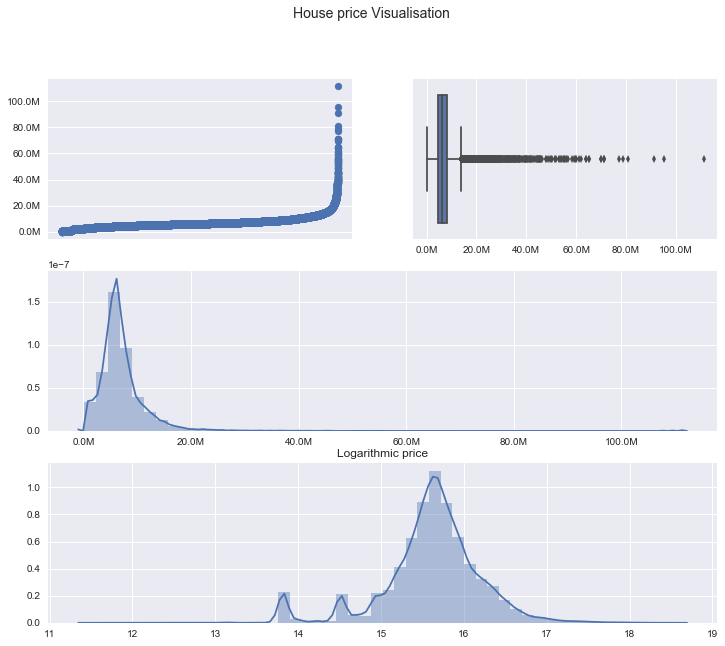

In [6]:
single_feature_visualisation(y_train,y_label='',sup_title='House price Visualisation',inplace_transform=False,
                             transform=(np.log,'Logarithmic price'),f_formatter=millions_formatter)   

Its looks like we have median price values around 7-8 millions and a lot ~30 million flats near 75% quantil(probably premium segment flats) and some outlines(luxary segment).<br>
Let's look how median prices have changed over time.

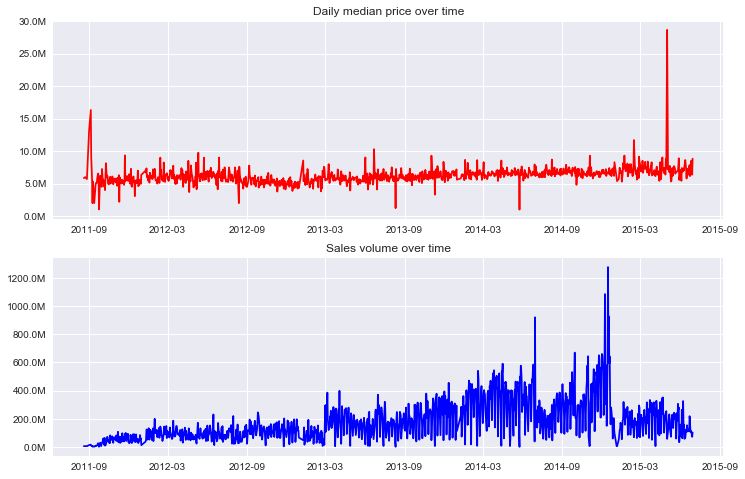

In [7]:
temp_df=x_train[['timestamp']].copy(deep=True)
temp_df['price_doc']=y_train
temp_df_grouped_median = temp_df.groupby('timestamp')[['price_doc']].median()

temp_df_grouped_sum = temp_df.groupby('timestamp')[['price_doc']].sum()

plt.figure(figsize=(12,8))
ax1=plt.subplot(2, 1, 1)
ax1.plot(temp_df_grouped_median.index, temp_df_grouped_median['price_doc'], color='r', )
ax1.set_title('Daily median price over time')
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax2=plt.subplot(2, 1, 2)
ax2.plot(temp_df_grouped_sum.index, temp_df_grouped_sum['price_doc'], color='b', )
ax2.set_title('Sales volume over time');
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

Notisable lightly linear trend.<br>
Let's look on features.
## Features
data types:

In [8]:
count_data_types_diff(x_train)

,Column Type,Count
0,int64,156
1,datetime64[ns],1
2,float64,119
3,object,15


So majority are numerical,with some categoracal and 1 date type data

In [9]:
x_train.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

It seems that there are a lot of missing data.<br>
Let's get more accurate number of missing values.

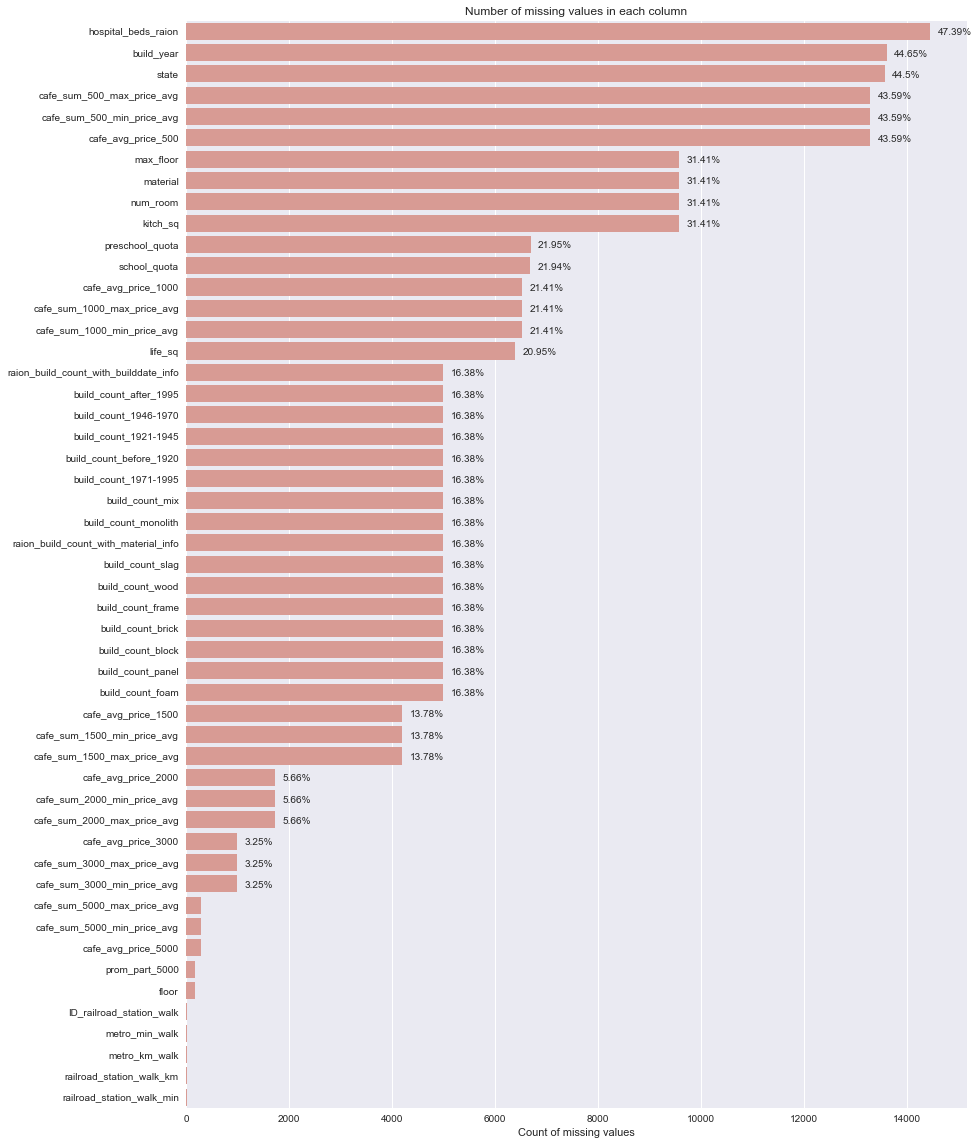

Number if features with skips: 51 
Proportion: 17.53%


In [10]:
missing_df=missing_values_count(x_train,x_title='Count of missing values',y_title='Number of missing values in each column')
print('Number if features with skips:',missing_df.shape[0],'\nProportion:',
      '{:.2%}'.format(missing_df.shape[0]/x_train.shape[1]))

### Feature importance overview
We have 291 feature,so lets exprore most important of them(on tuning model step more complex methods will be used, but now, small random forest is enought)

Feature ranking:


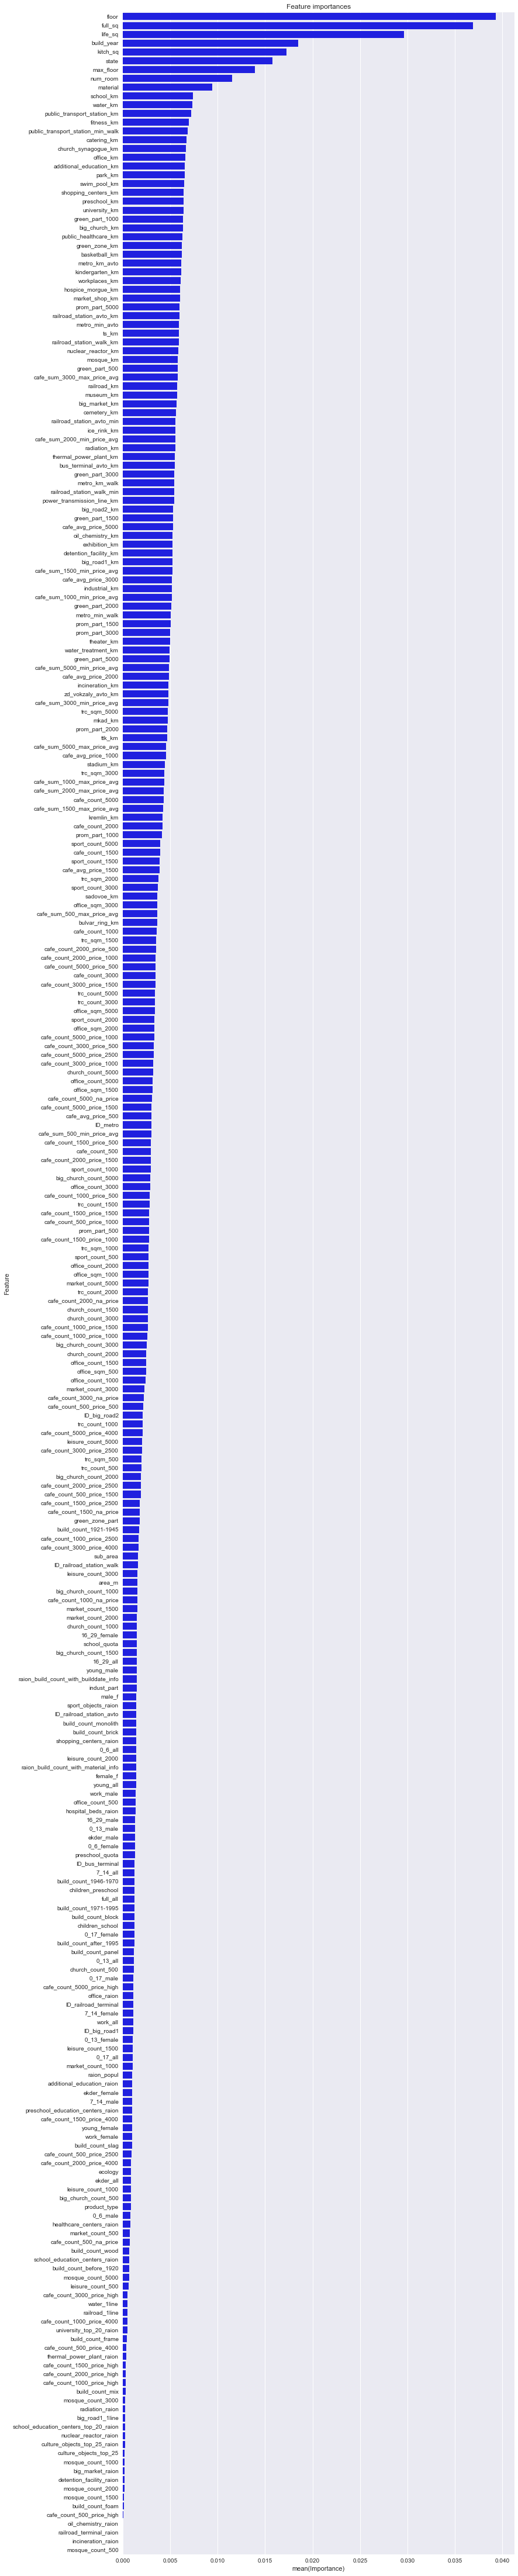

In [11]:
temp_df=x_train.copy(deep=True)
for f in temp_df.columns:
    if temp_df[f].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(temp_df[f].values)) 
        temp_df[f] = lbl.transform(list(temp_df[f].values))
        
x_train_dropped=temp_df.dropna()
forest_feature_importance_df=forest_feature_importance(x_train_dropped.drop(["id", "timestamp"],axis=1),y_train[x_train_dropped.index],n_trees=10,fig_size=(12,80))

In [12]:
forest_feature_importance_df.head(10)

,Feature,Importance,std
0,floor,0.039284,0.003775
1,full_sq,0.036885,0.004433
2,life_sq,0.029646,0.003218
3,build_year,0.018492,0.002191
4,kitch_sq,0.017265,0.001999
5,state,0.015780,0.002421
6,max_floor,0.013935,0.002233
7,num_room,0.011497,0.002400
8,material,0.009425,0.001576
9,school_km,0.007398,0.002403


Top 10 features are connected with common sense, so lets go on.

### Floor

max floor 77.0


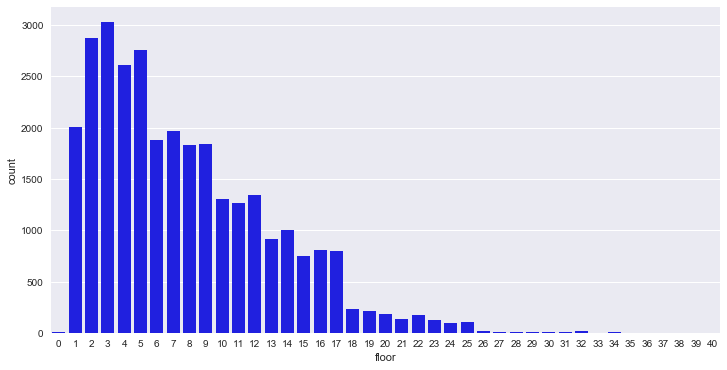

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x="floor", data=x_train,color='b')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,pos:'%d' %x))
#plt.xticks(rotation='vertical')
print('max floor',max(x_train.floor))

Its obvious that there can be no flats on 77 floor.<br>More detailed view:

In [14]:
upper41=x_train[x_train.floor>41]
upper41

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

product_type =Investment.Wow,intresting. <br>
product_types:

In [15]:
x_train.product_type.unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

In [16]:
print('prices from 2012 to 2015 in mln rubles for one object',list(y_train[[2499,30311]]/1000000))

prices from 2012 to 2015 in mln rubles for one object [13.0, 8.8576800000000002]


### First conclusions
* i suppose data set can be divided on 2 data sets by property type just because commersial property behavior must be different from private flats behavior.
*  two objects (id 2502 and 30314) are same ,but **raion_popul** during 3 years hasnt changed(its impossible),so<br>
   its means that features values has no connection to timestamp(probably  values were given on last date)<br>
   **more important** that we can fill missing values just finding same objects in different timestamps
* we can analys macro economy by comparing prices of same objects (for example the cost of the object is reduced dy 30% in 3 years and maybe this dependency can be traced to other objects)
   

# Cleaning data
steps:
* full_sq=max(full_sq,life_sq)
* i hope that such metrics as metro_km_avto,metro_km_avto','metro_min_walk' ,etc shoud be enought to identify and help to fill skips in **'max_floor', 'material','build_year','state'**
* random forest to fill ecology **'no data'** in my realisation (cross validation step was skipped(accuracy was around 97%)


In [17]:
house_params=['full_sq', 'life_sq','floor','max_floor','material', 'build_year',
 'num_room','kitch_sq','state','ecology','sub_area','metro_km_walk','kindergarten_km', 'school_km', 'park_km','railroad_station_walk_km']
location_params=['sub_area','area_m','raion_popul','green_zone_part','indust_part','children_preschool','preschool_quota',
 'preschool_education_centers_raion', 'children_school', 'school_quota','school_education_centers_raion',
 'school_education_centers_top_20_raion','hospital_beds_raion','healthcare_centers_raion','university_top_20_raion',
 'sport_objects_raion','additional_education_raion','culture_objects_top_25','culture_objects_top_25_raion',
 'shopping_centers_raion','office_raion','thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion',
 'railroad_terminal_raion','big_market_raion','nuclear_reactor_raion','detention_facility_raion','full_all','male_f',
 'female_f','young_all','young_male','young_female','work_all','work_male','work_female','ekder_all','ekder_male','ekder_female',
 '0_6_all','0_6_male','0_6_female','7_14_all','7_14_male','7_14_female','0_17_all',
 '0_17_male','0_17_female','16_29_all''16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995']
house_loc_params=['ID_metro','sub_area',
 'area_m',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk']

In [18]:
ecology_params=['park_km','green_zone_km','industrial_km','water_treatment_km','cemetery_km',
 'incineration_km','railroad_station_avto_km','public_transport_station_km','water_km',
 'water_1line','mkad_km','big_road1_1line','big_road2_km','railroad_km', 'oil_chemistry_km',
 'nuclear_reactor_km','radiation_km','power_transmission_line_km','thermal_power_plant_km','green_part_500']


house_loc_params=['ID_metro','sub_area',
 'area_m',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk']

In [19]:
x_merged=x_train.copy(deep=True)
x_merged['price']=y_train
x_merged=pd.concat([x_merged,x_test],axis=0)

In [20]:
%%time
def most_common(arr):
    t=arr.dropna()
    if len(t)>0:
        return Counter(list(arr)).most_common(1)[0][0]
    else: return np.nan

def eco_forest(df,ecology_params):
    eco_df=df[ecology_params+['ecology']].drop_duplicates()
    eco_df=eco_df[eco_df.ecology!='no data']
    eco_df.dropna(inplace=True,axis=1)
    lbl=LabelEncoder()
    lbl.fit(eco_df.ecology)
    y_eco=lbl.transform(eco_df.ecology)
    dummy_df=pd.get_dummies(eco_df[['big_road1_1line','water_1line']])
    eco_df.drop(['ecology','big_road1_1line','water_1line'],axis=1,inplace=True)
    rf=RandomForestClassifier(n_estimators=2000)
  
    scaler=StandardScaler().fit(eco_df)

    rf.fit(np.hstack([dummy_df.values,scaler.transform(eco_df)]),y_eco)
    return rf,lbl,scaler,eco_df.columns

def ecology_replace(x):
    x_uniq=x.unique()
    if len(x_uniq)>1:
        x=[el for el in x if el!='no data']
        res=max(set(x), key=x.count)
    else:
        res=x_uniq[0]
    return res
    
replace_arr=lambda column,data,dict_df:data[[column,'id_house']].apply(lambda row:dict_df.ix[row[1]][column],axis=1)    
replace_arr_with_nan=lambda column,data,dict_df:data[[column,'id_house']].apply(lambda row:dict_df.ix[row[1]][column]
                                                       if np.isnan(row[0]) else row[0] ,axis=1)     
    
def prerpocess_house_params(data):
    df=data.copy(deep=True)
    df['full_sq']=df[['full_sq','life_sq']].apply(lambda row:max(row[0],row[1]),axis=1)
    unique_houses=df[house_loc_params].drop_duplicates().reset_index(drop=True)
    unique_houses['id_house']=range(unique_houses.shape[0])
    df=pd.merge(df,unique_houses ,on =house_loc_params,how='left')
    unique_houses_groped=df.groupby(['id_house']).agg({

    'max_floor' : most_common, #np.median, 
    'material':most_common ,#np.median,
    'build_year':most_common, #np.median,
    'state':most_common, #np.median,
    'ecology':ecology_replace
    })  
    #df['max_floor']=df[['max_floor','id_house']].apply(lambda row:unique_houses_groped.ix[row[1]]['max_floor']
    #                                                  if np.isnan(row[0]) else row[0] ,axis=1)
    df['max_floor']=replace_arr('max_floor',df,unique_houses_groped)
    df['material']=replace_arr('material',df,unique_houses_groped)
    df['build_year']=replace_arr('build_year',df,unique_houses_groped)
    df['state']=replace_arr_with_nan('state',df,unique_houses_groped)
    #df['ecology']=replace_arr('ecology',df,unique_houses_groped)
    df['ecology']=df[['ecology','id_house']].apply(lambda row:unique_houses_groped.ix[row[1]]['ecology']
                                                       if row[0]=='no data' else row[0] ,axis=1)       

    rf,lbl,scaler,eco_cols=eco_forest(df,ecology_params)
    dummy_eco_df=pd.get_dummies(df[['big_road1_1line','water_1line']])
    eco_pred=lbl.inverse_transform(rf.predict(np.hstack([dummy_eco_df.values,scaler.transform(df[eco_cols])])))
    df['eco_pred']=eco_pred
    df['ecology']=df[['ecology','eco_pred']].apply(lambda row:row[1] if row[0]=='no data' else row[0],axis=1)
    return df
    
temp_merged=prerpocess_house_params(x_merged)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Wall time: 8min 58s


# Full Square

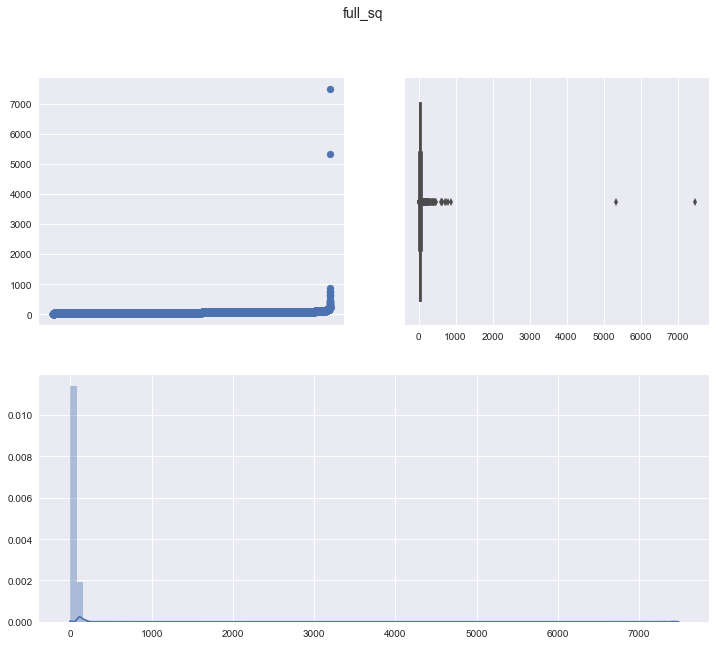

In [21]:
single_feature_visualisation(temp_merged.full_sq,y_label='',sup_title='full_sq',n_bins=100)

5000 squre meters or more-this can not be in real life.So we must deal with this mistakes.<br>
My heuristics:divide outliners by l00(i guess its problems in format)

In [22]:
def squar_fix_outliner(data):
    data['full_sq']=data['full_sq'].apply(lambda x:x/100 if x>4000 else x)
    data['life_sq']=data['life_sq'].apply(lambda x:x/100 if x>4000 else x)
    return data
temp_merged=squar_fix_outliner(temp_merged)

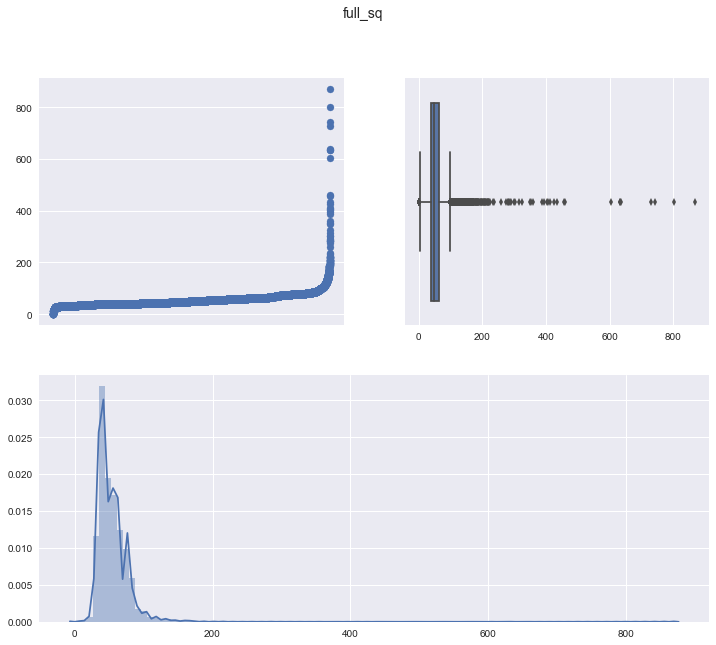

In [23]:
single_feature_visualisation(temp_merged.full_sq,y_label='',sup_title='full_sq',n_bins=100)

Surprice!We have zero value squares.Lets accept that square cannot be less 10 $m^2$

Now looks much better(squars $\sim$ 800 really exists)<br>
Lest look how squares separated by product type:

In [24]:
def closest_in_list(myNumber,myList):
    return min(myList, key=lambda x:abs(x-myNumber))


def fix_square(data):
    manual_sq={23231:74,33974:60,36824:64}
    df=data.copy(deep=True)
    df['price_sq']=df.price/df.full_sq
    agg_price_house=df.groupby(['id_house']).agg({
            'price_sq':np.median,'full_sq':lambda x:list(x)
        })
    df['estimated_sq']=df.price/   df.id_house.apply(lambda x:agg_price_house.ix[x].price_sq)
   
    df['full_sq']=df[['estimated_sq','id_house','full_sq']].apply(lambda row:closest_in_list(row[0],agg_price_house.ix[row[1]].full_sq) if row[2]<10 else row[2],axis=1)
    df['full_sq']=df[['full_sq','id']].apply(lambda row:manual_sq[row[1]] if row[1] in list(manual_sq.keys())else row[0],axis=1)
    return df.drop(['price_sq','estimated_sq'],axis=1)
temp_merged=fix_square(temp_merged)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


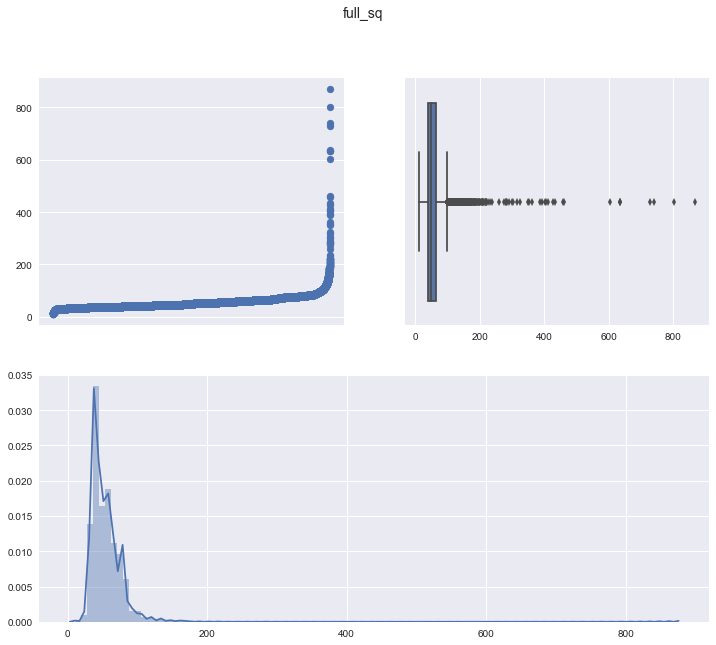

In [25]:
single_feature_visualisation(temp_merged.full_sq,y_label='',sup_title='full_sq',n_bins=100)

# product_type

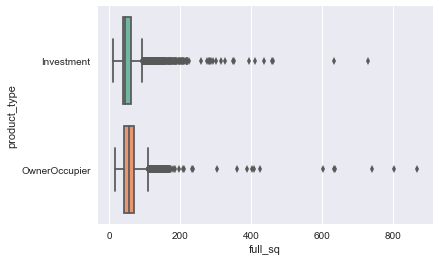

In [26]:
sns.boxplot(y='product_type',x='full_sq',data=temp_merged, palette="Set2");

In [27]:
def fill_missing_product_type(data):
    df=data.copy(deep=True)
    prod_type=data.groupby(['sub_area']).agg({'product_type':lambda lst:Counter(lst).most_common(1)[0][0]}).to_dict()['product_type']
    df['product_type']=temp_merged[['product_type','sub_area']].apply (lambda row:
                                                                       row[0] if not pd.isnull(row[0]) 
                                                                       else prod_type[row[1]],axis=1)
    return df 
temp_merged=fill_missing_product_type(temp_merged)

# Life Square

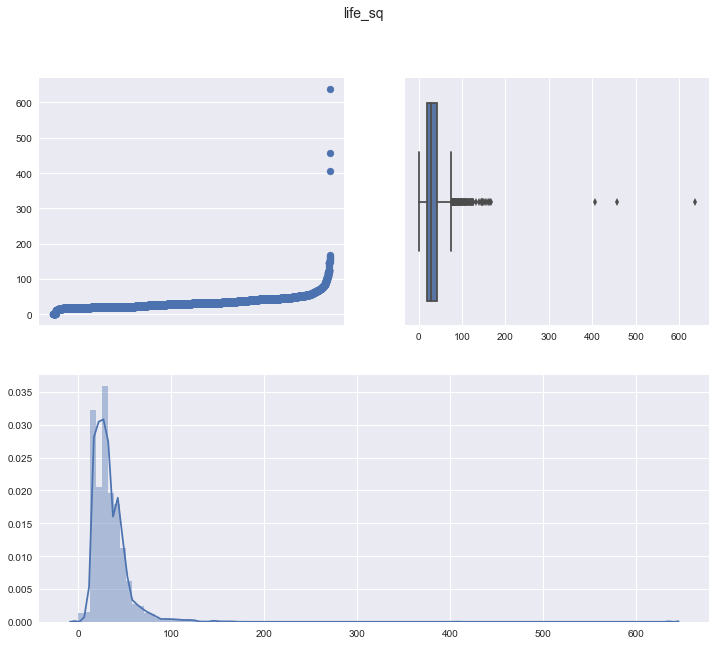

In [28]:
single_feature_visualisation(temp_merged.dropna().life_sq,y_label='',sup_title='life_sq',n_bins=100)

In [29]:
def correct_life_square(full_sq,life_sq,dict_val,life_prop,min_th,max_th,th):
    if pd.isnull(life_sq):
        return dict_val*full_sq
    elif life_prop> min_th*(1-th) and life_prop<max_th*(1+th):
        return life_sq
    else:
        return dict_val*full_sq
    


def life_fix_missing(data,th=0.25):

    df=data.copy(deep=True)
    df['life_prop']=df.life_sq/df.full_sq
    life_house_groped=df.groupby(['id_house','sub_area']).agg({'life_prop':np.median,}).reset_index()
    life_area_groped=df.groupby(['sub_area']).agg({'life_prop':np.median}).reset_index()

    life_house_groped=pd.merge(life_house_groped,life_area_groped ,on='sub_area',how='left')
    life_house_groped=life_house_groped.ix[:,-2:].mean(axis=1).to_dict()
    min_th=min(list(life_house_groped.values()))
    max_th=max(list(life_house_groped.values()))
    df['life_sq']=df[['life_sq','full_sq',
                      'id_house','life_prop']].apply(lambda row:
                                                     correct_life_square(row[1],
                                                                         row[0],
                                                                         life_house_groped[row[2]],row[3],
                                                                         min_th,max_th,th),axis=1)
    df.drop('life_prop',axis=1,inplace=True)
    return df
temp_merged=life_fix_missing(temp_merged)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


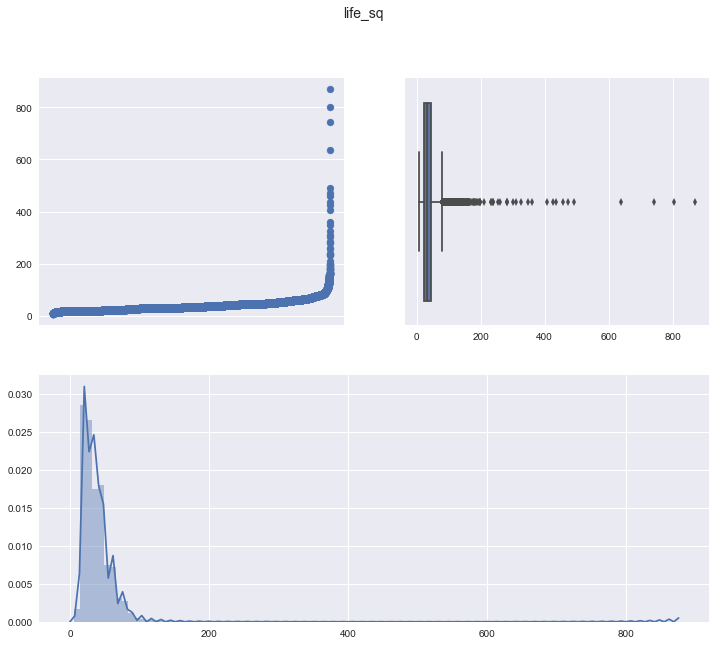

In [30]:
single_feature_visualisation(temp_merged.life_sq,y_label='',sup_title='life_sq',n_bins=100)

# Build_year

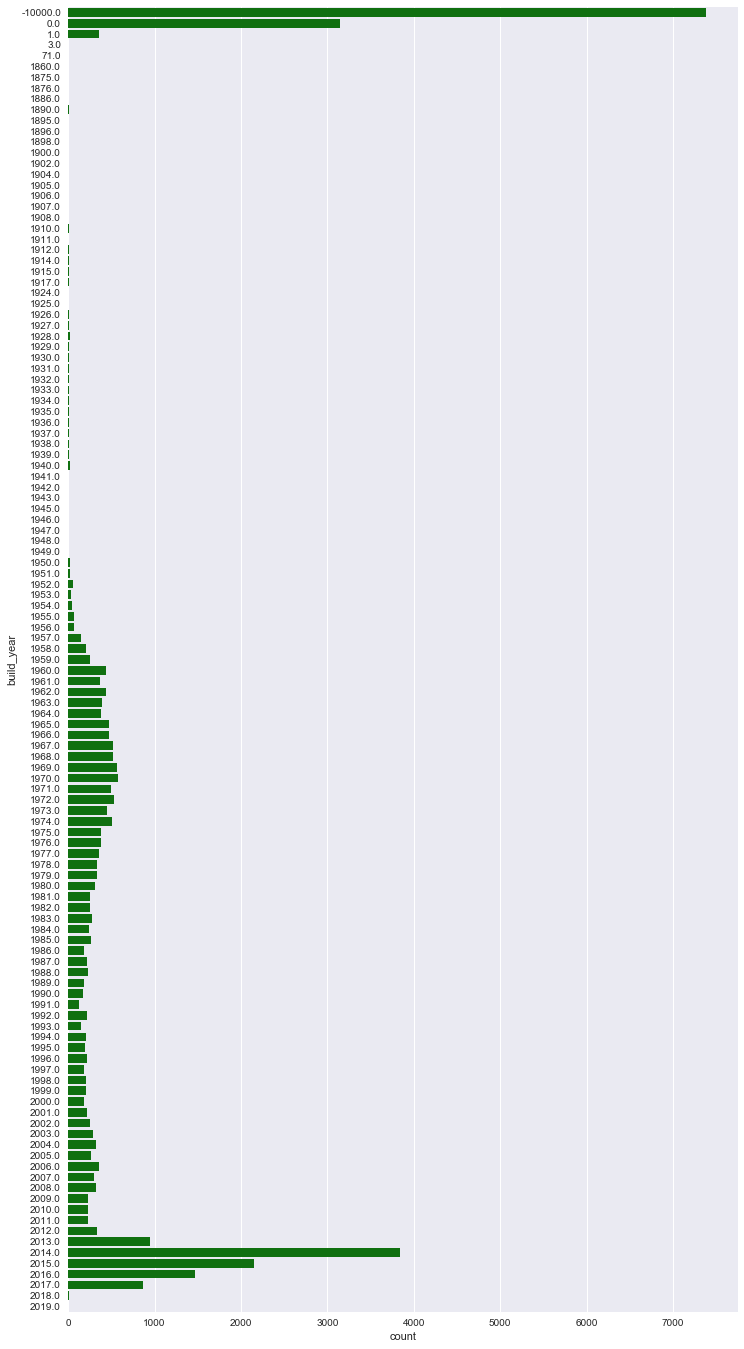

In [31]:
plt.figure(figsize=(12,24))
sns.countplot(y=temp_merged.build_year.fillna(-10000),color='g');

In [32]:
def process_build_year(data):
    
    data['build_year']=data.build_year.apply(lambda x: -10000 if x<1800 or np.isnan(x) else x)
    return data
temp_merged=process_build_year(temp_merged)

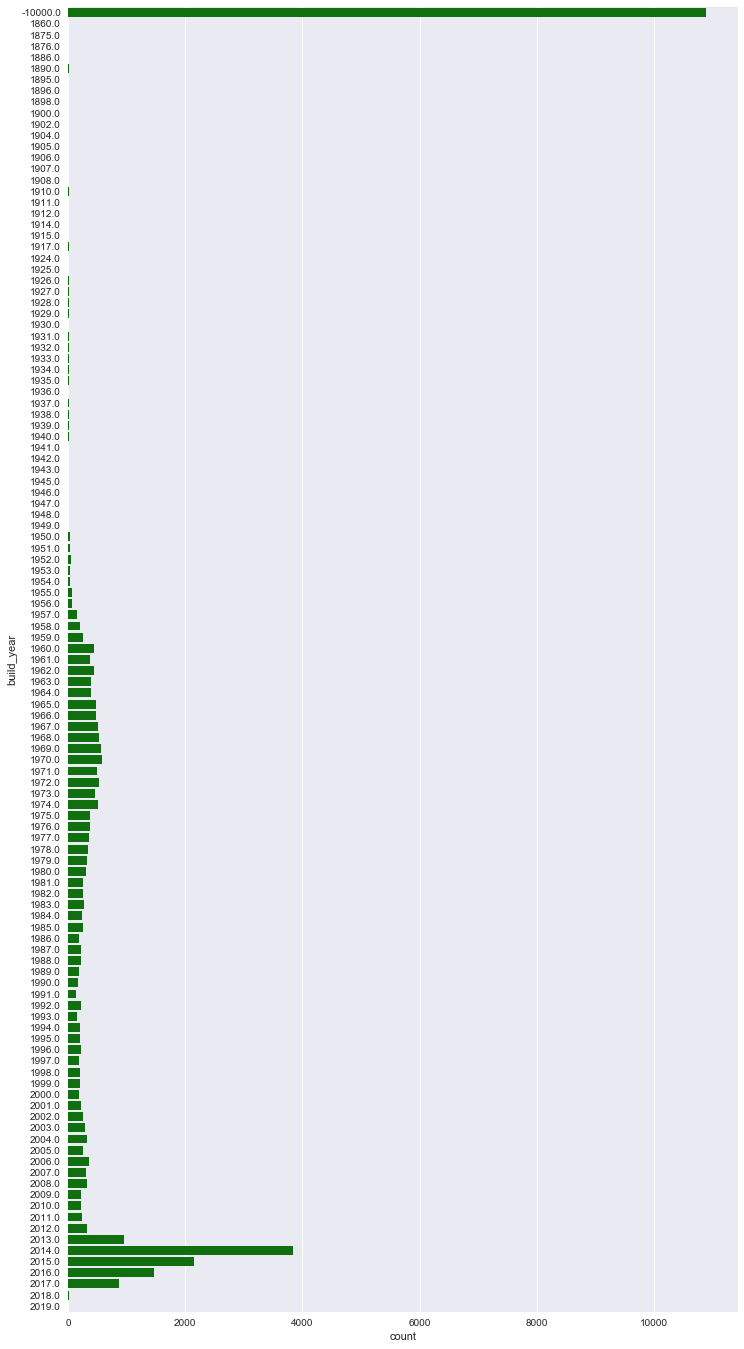

In [33]:
plt.figure(figsize=(12,24))
sns.countplot(y=temp_merged.build_year,color='g');

# kitch_sq
Filling missing values and correction errors with random forest(i tried KNN ,but rf seems to be better)

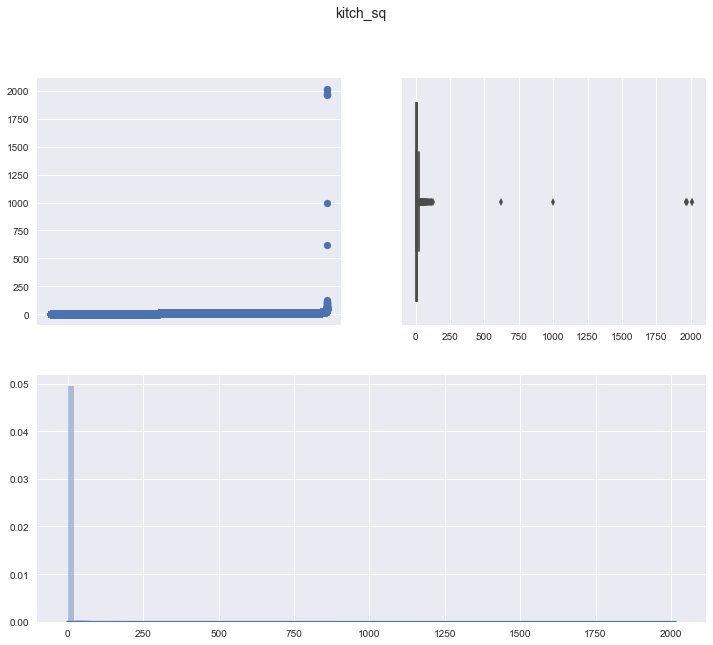

In [34]:
single_feature_visualisation(temp_merged.kitch_sq.dropna(),y_label='',sup_title='kitch_sq',n_bins=100)

In [35]:
%%time
def transform_knn(data):
    df=data.copy(deep=True)
    df.fillna('nan')
    scaler=StandardScaler()
    df['full_sq']=scaler.fit_transform(df.full_sq)
    cosine_cat_columns=['id_house','build_year','sub_area','product_type']
    df_cat=pd.get_dummies(df[cosine_cat_columns])
    df_cat['full_sq']=df['full_sq']
    return df_cat
def fix_kitch_outliners(data,up_th=1.5,low_th=0.7):
    df=data.copy(deep=True)
    df['build_year']=df[['build_year','id']].apply(lambda row:2014 if row[1]==21418 else row[0],axis=1)
    index=df[(df.kitch_sq>5) & (df.kitch_sq<df.full_sq)].index
    target=df.ix[index].kitch_sq.values
    knn_df=transform_knn(df)
    #knn=KNeighborsRegressor()
    #knn.fit(knn_df.ix[index],target)
    rf=RandomForestRegressor(n_estimators=1000)
    rf.fit(knn_df.ix[index],target)
    df['pred_kitch']=rf.predict(knn_df)
    df['kitch_sq']=df.kitch_sq.fillna(0)
    df['delta_kitch']=df.kitch_sq/df.pred_kitch
    df['kitch_sq']=df[['kitch_sq','pred_kitch','delta_kitch']].apply(lambda row: row[0] if row[2] >low_th and row[2]<up_th else row[1],axis=1)
    return df.drop(['delta_kitch','pred_kitch'],axis=1)

temp_merged=fix_kitch_outliners(temp_merged)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_

Wall time: 13min 49s


## life_sq
Little fix( life_sq can't be more then full_sq- )

In [36]:
def life_sq_fix(data):
    data['life_sq']=data[['full_sq','life_sq','kitch_sq']].apply(lambda row:
                                                                 row[1] if row[1]<=row[0]-row[2] else row[0]-row[2],axis=1)
    return data
temp_merged=life_sq_fix(temp_merged)

In [37]:
#from scipy import stats
def cramers_statistic(conf_matrix):
    chi2 = stats.chi2_contingency(conf_matrix)
    p=chi2[1]
    chi2=chi2[0]
    n = conf_matrix.sum()
    r, m = conf_matrix.shape
    phi = chi2/n
    r_corr = r - ((r-1)**2)/(n-1)
    m_corr = m - ((m-1)**2)/(n-1)
    phi_corr = max(0, phi - ((m-1)*(r-1))/(n-1))
    return np.sqrt(phi_corr/min((m_corr - 1),(r_corr - 1))),p

def cramers_correlation(data, cat_1, cat_2):
    if data[cat_1].equals(data[cat_2]):
        return 1.0
    confusion_matrix = pd.crosstab(data[cat_1], data[cat_2])
    return cramers_statistic(np.array(confusion_matrix))

#cramers_correlation(l,'build_year','state')

# max_floor

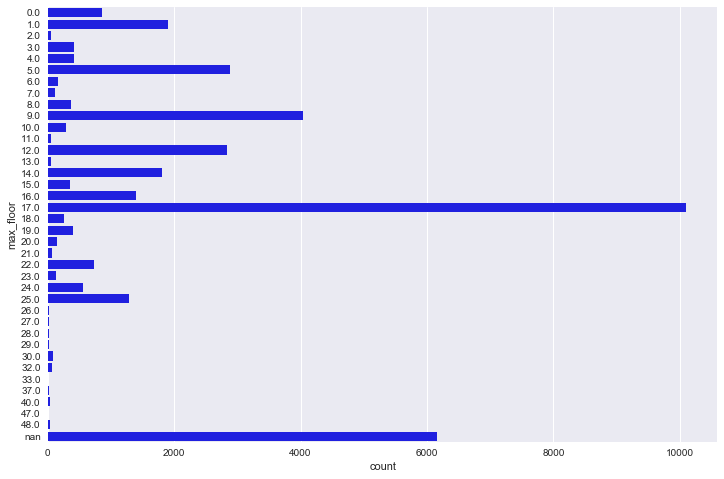

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(y=temp_merged.max_floor.sort_values().fillna('nan'),color='b');

In [39]:
def fix_max_floor(data):
    err_floor=pd.concat([data[data.max_floor<data.floor],data[pd.isnull(data.max_floor)]],axis=0).drop_duplicates()
    err_floor=pd.DataFrame(err_floor.pivot_table(index='id_house',values='floor',aggfunc=np.max)).reset_index()
    err_floor.columns=['id_house','err_max_floor_flg']
    data=pd.merge(data,err_floor,on='id_house',how='left')
    data['max_floor']=data[['max_floor','err_max_floor_flg']].apply(lambda row:max(row[1],row[0]),axis=1)
    data['c']=(data['err_max_floor_flg']/data['err_max_floor_flg']).fillna(0)
    return data
temp_merged=fix_max_floor(temp_merged)

# Macro economics
Lets look on macro file on interesting columns

In [40]:
macro_features=['gdp_quart_growth','cpi','ppi','balance_trade_growth',
       'usdrub','net_capital_export','average_provision_of_build_contract_moscow',
       'deposits_growth','deposits_rate','mortgage_growth','mortgage_rate']
macro_subset=macro[['timestamp']+macro_features]
macro_subset=macro_subset[(macro_subset.timestamp>=min(temp_merged.timestamp)) & (macro_subset.timestamp<=max(temp_merged.timestamp)) ]

## Feature generation

In [41]:
cat_features=['ecology','build_year','state','max_floor','material','public_transport_station_min_walk','sub_area']
real_features=['c','floor','full_sq','kitch_sq','life_sq','price','product_type']

In [42]:
temp_merged=pd.merge(temp_merged[['timestamp']+cat_features+real_features],macro_subset,on='timestamp',how='inner')

In [43]:
#fixing price
temp_merged['price_meter']=temp_merged.price/temp_merged.full_sq
median_price=np.median(temp_merged.price_meter.dropna())
temp_merged['temp_usd_compare']=temp_merged.price_meter*temp_merged.usdrub/median_price

In [44]:
%%time
temp_merged['price']=temp_merged[['price',
                                  'full_sq',
                                  'temp_usd_compare',
                                  'usdrub']].apply(lambda row:row[3]*row[1] if row[2]<3 else row[0],axis=1)
temp_merged.drop(['price_meter','temp_usd_compare'],axis=1,inplace=True)

Wall time: 5.11 s


In [45]:
#year_month
temp_merged['year']=temp_merged["timestamp"].dt.year
temp_merged['month']=temp_merged["timestamp"].dt.month

# ratio of living area to full area 
temp_merged["ratio_life_sq_full_sq"] = temp_merged["life_sq"] / temp_merged["full_sq"]
# ratio of kitchen area to full area #
temp_merged["ratio_kitch_sq_life_sq"] = temp_merged["kitch_sq"] /temp_merged["full_sq"]
#building year
temp_merged["age_of_building"] = temp_merged["build_year"] - temp_merged["year"]

#last fist floor
temp_merged['fist_floor']=temp_merged.floor.apply(lambda x:1 if x==1 else 0)
temp_merged['last_floor']=temp_merged[['floor','max_floor']].apply(lambda x:1 if (x[1]-x[0])<1 else 0,axis=1)

In [46]:
temp_merged['last_floor']=temp_merged[['floor','max_floor']].apply(lambda x:1 if (x[1]-x[0])<1 else 0,axis=1)

In [47]:
temp_merged.to_csv('temp.csv',sep=';',encoding='utf-8',index=False)

In [48]:
temp_merged.fillna(-10000,inplace=True)

In [49]:
#temp_merged=pd.read_csv('temp.csv',sep=';',encoding='utf-8')

In [54]:

temp_merged.drop('timestamp',axis=1,inplace=True)
encode_cols=['ecology','sub_area','product_type']


for column in encode_cols:
    lbl=LabelEncoder()
    lbl.fit(temp_merged[column])
    temp_merged[column]=lbl.transform(temp_merged[column])

ecology
sub_area
product_type


In [93]:
n=x_train.shape[0]
y=list(temp_merged.price)[:n]
temp_merged.drop('price',inplace=True,axis=1)
X_train_new=temp_merged.ix[:n-1]
X_test_new=temp_merged.ix[n:]

In [111]:
%%time
y_new=np.log(np.array(y)/X_train_new.full_sq)
rf=RandomForestRegressor(n_estimators=2000)
rf.fit(X_train_new,y_new)

Wall time: 52min 53s


In [115]:
y_test=rf.predict(X_test_new)

In [131]:
#y_test=rf.predict(X_test_new)
save_df=x_test[['id']]
save_df['price_doc']=np.exp(y_test)*np.array(X_test_new.full_sq)
save_df.to_csv(os.path.join(save_path,'1.csv'),sep=',',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
%%time
y_new=np.log(np.array(y)/X_train_new.full_sq/X_train_new.usdrub)
rf=RandomForestRegressor(n_estimators=2000)
rf.fit(X_train_new,y_new)
y_test2=rf.predict(X_test_new)

Wall time: 55min 46s


In [135]:
%%time
save_df=x_test[['id']]
save_df['price_doc']=np.exp(y_test)*np.array(X_test_new.full_sq)*np.array(X_test_new.usdrub)
save_df.to_csv(os.path.join(save_path,'2.csv'),sep=',',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Wall time: 2.38 s


In [136]:
import xgboost as xgb

In [140]:
#dtrain_all = xgb.DMatrix(X_train_all, ylog_train_all, feature_names=df_columns)
y_new=np.log(np.array(y)/X_train_new.full_sq)
dtrain = xgb.DMatrix(X_train_new, y_new)

dtest = xgb.DMatrix(X_test_new)

In [141]:

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=195)


In [144]:
ylog_pred = model.predict(dtest)
save_df=x_test[['id']]
save_df['price_doc']=np.exp(ylog_pred)*np.array(X_test_new.full_sq)
save_df.to_csv(os.path.join(save_path,'3.csv'),sep=',',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
